In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import models
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf

2023-11-09 15:56:29.674595: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-09 15:56:29.727693: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True # dynamically grow the memory used on the GPU
config.log_device_placement = True # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)

Device mapping: no known devices.


2023-11-09 15:56:31.280038: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-11-09 15:56:31.280079: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: 1e2adf4fbdc9
2023-11-09 15:56:31.280085: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: 1e2adf4fbdc9
2023-11-09 15:56:31.280211: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 535.104.5
2023-11-09 15:56:31.280226: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 525.105.17
2023-11-09 15:56:31.280231: E tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:312] kernel version 525.105.17 does not match DSO version 535.104.5 -- cannot find working devices in this configuration


In [3]:
pip install Matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn 


Note: you may need to restart the kernel to use updated packages.


In [5]:
my_data_dir = 'dataset/cell_images'

In [6]:
os.listdir(my_data_dir)

['test', 'train']

In [7]:
test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'

In [8]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [9]:
len(os.listdir(train_path+'/uninfected/'))
len(os.listdir(train_path+'/parasitized/'))

12479

In [10]:
os.listdir(train_path+'/parasitized')[0]

'C182P143NThinF_IMG_20151201_172257_cell_157.png'

In [11]:
para_img= imread(train_path+'/parasitized/'+ os.listdir(train_path+'/parasitized')[0])

In [12]:
para_img.shape 

(100, 85, 3)

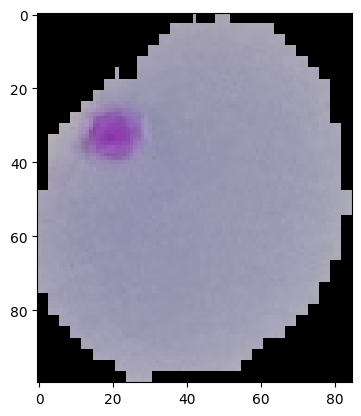

In [13]:
plt.imshow(para_img)

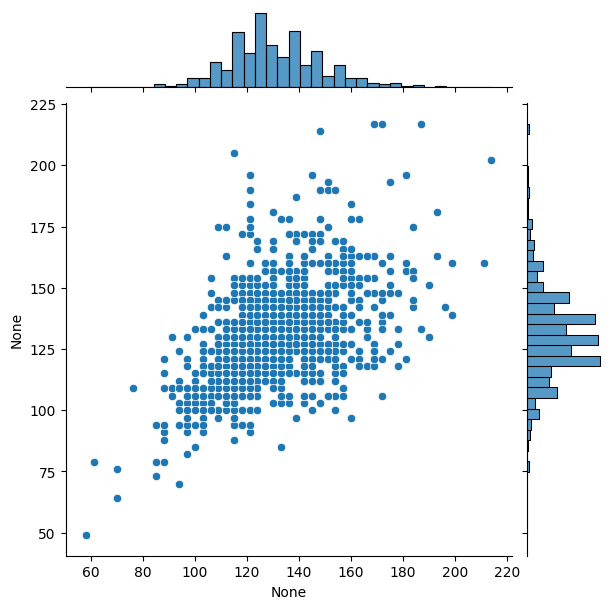

In [14]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'/uninfected'):
    img = imread(test_path+'/uninfected'+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)
sns.jointplot(x=dim1,y=dim2)
image_shape = (130,130,3)

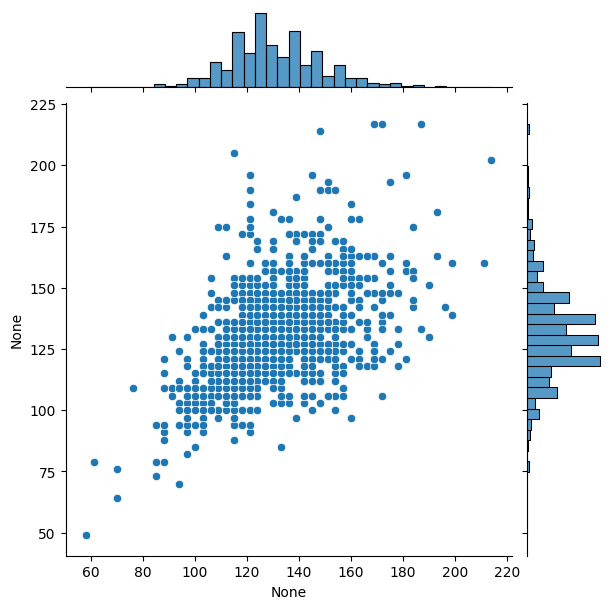

In [15]:
sns.jointplot(x=dim1,y=dim2)

In [16]:
image_shape = (130,130,3)

In [17]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [18]:

image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [19]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [20]:
image_shape = (130,130,3)

In [24]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [23]:

image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [25]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [26]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.compat.v1.keras.backend import set_session

In [27]:
model = models.Sequential()
model.add(keras.Input(shape=(image_shape)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(128))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

batch_size = 16

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

In [28]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [29]:

train_image_gen.batch_size

16

In [30]:
len(train_image_gen.classes)

24958

In [31]:

train_image_gen.total_batches_seen

0

In [32]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [33]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [34]:
results = model.fit(train_image_gen,epochs=10,
                              validation_data=test_image_gen
                             )

Epoch 1/10
1560/1560 [==============================] - 119s 75ms/step - loss: 0.6942 - accuracy: 0.5025 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
1560/1560 [==============================] - 118s 76ms/step - loss: 0.6933 - accuracy: 0.5006 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
1560/1560 [==============================] - 118s 75ms/step - loss: 0.6932 - accuracy: 0.4952 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
1560/1560 [==============================] - 118s 76ms/step - loss: 0.6932 - accuracy: 0.4997 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
1560/1560 [==============================] - 117s 75ms/step - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
1560/1560 [==============================] - 118s 75ms/step - loss: 0.6932 - accuracy: 0.4969 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
1560/1560 [==============================] - 118s 76ms/step - loss: 0.6932 - accuracy: 0.4964 - val_loss: 0

In [44]:
model.save('cell_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['loss', 'accuracy']

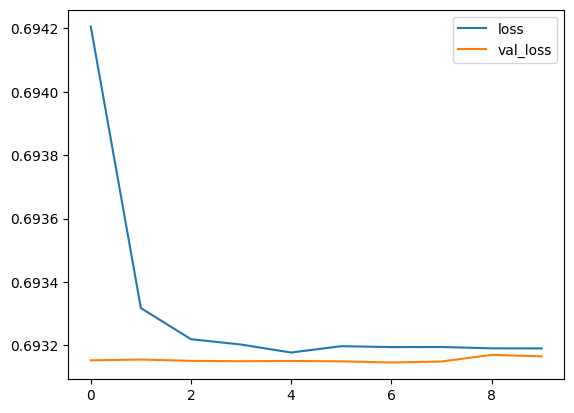

In [43]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()
model.metrics_names

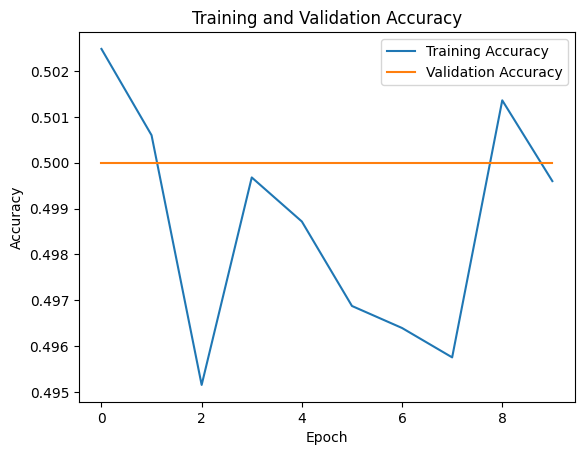

In [45]:

history = results.history

# Plot accuracy and validation accuracy
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [46]:
model.evaluate(test_image_gen)
pred_probabilities = model.predict(test_image_gen)
test_image_gen.classes
predictions = pred_probabilities > 0.5
print(classification_report(test_image_gen.classes,predictions))
confusion_matrix(test_image_gen.classes,predictions)

163/163 [==============================] - 10s 63ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1300
           1       0.00      0.00      0.00      1300

    accuracy                           0.50      2600
   macro avg       0.25      0.50      0.33      2600
weighted avg       0.25      0.50      0.33      2600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[1300,    0],
       [1300,    0]])

1/1 [==============================] - 0s 75ms/step


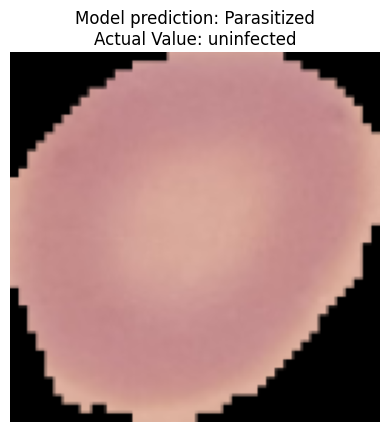

In [48]:
import random as rnd
list_dir=["uninfected","parasitized"]
dir_=(rnd.choice(list_dir))
p_img=imread(train_path+'/'+dir_+'/'+os.listdir(train_path+'/'+dir_)[rnd.randint(0,100)])
img  = tf.convert_to_tensor(np.asarray(p_img))
img = tf.image.resize(img,(130,130))
img=img.numpy()
pred=bool(model.predict(img.reshape(1,130,130,3))<0.5 )
plt.title("Model prediction: "+("Parasitized" if pred  else "Un Infected")
			+"\nActual Value: "+str(dir_))
plt.axis("off")
plt.imshow(img)
plt.show()